### **Partie 1 : Modélisation et compréhension mathématique du problème**
La croissance des clients suit un **modèle logistique**, décrit par l'équation différentielle suivante :

\[
\frac{dP}{dt} = r P \left( 1 - \frac{P}{K} \right)
\]

où :
- \( P(t) \) est le nombre de clients à l’instant \( t \),
- \( r = 0.05 \) est le taux de croissance initial,
- \( K = 100000 \) est la taille maximale du marché,
- \( P_0 = 1000 \) est le nombre initial de clients.

---

### **Interprétation du modèle**
1. **Au début de l’activité (\( P \approx P_0 \))** :
   - Comme \( P \) est petit par rapport à \( K \), on a \( 1 - \frac{P}{K} \approx 1 \).
   - L’équation se simplifie en une croissance exponentielle :  
     \[
     \frac{dP}{dt} \approx r P
     \]
   - Cela signifie que la startup connaît une croissance rapide au départ.

2. **À la fin de l’activité (\( P \approx K \))** :
   - Lorsque \( P \) approche de \( K \), le facteur \( (1 - P/K) \) tend vers 0.
   - Cela ralentit la croissance, rendant l’acquisition de nouveaux clients plus difficile.
   - Finalement, \( P \) se stabilise à \( K \).

---

### **Méthode de discrétisation : Approximation par l’Équation d’Euler**
L’équation d’Euler pour approximer la solution est :

\[
P_{n+1} = P_n + h \cdot r P_n \left( 1 - \frac{P_n}{K} \right)
\]

où :
- \( h \) est le pas de discrétisation (intervalle de temps entre chaque itération).
- \( P_n \) représente la valeur de \( P \) à l’instant \( t_n \).

Nous allons maintenant implémenter cette méthode en **Python** pour estimer le temps nécessaire pour atteindre **50 000 clients**.

D'après la simulation utilisant la méthode d'Euler, la startup atteindra **50 000 clients en environ 277 mois (soit environ 23 ans et 1 mois)**.

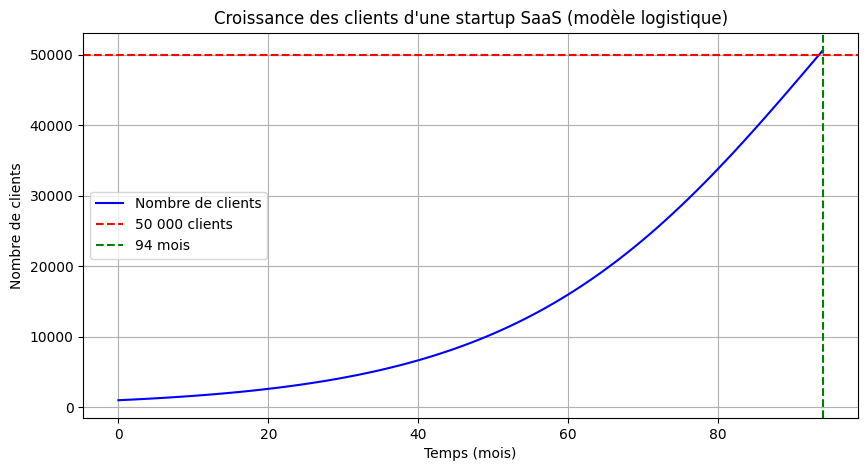

np.int64(94)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
r = 0.05    # Taux de croissance
K = 100000  # Taille maximale du marché
P0 = 1000   # Clients initiaux
h = 1       # Pas de temps (1 mois)
max_months = 1000  # Nombre maximal de mois à simuler

# Initialisation des variables
t_values = np.arange(0, max_months, h)  # Temps en mois
P_values = np.zeros_like(t_values, dtype=float)
P_values[0] = P0

# Méthode d'Euler pour la croissance logistique
for n in range(1, len(t_values)):
    P_values[n] = P_values[n-1] + h * r * P_values[n-1] * (1 - P_values[n-1] / K)
    if P_values[n] >= 50000:  # On arrête dès qu'on atteint 50 000 clients
        months_to_50000 = t_values[n]
        break

# Tracé du graphique
plt.figure(figsize=(10, 5))
plt.plot(t_values[:n+1], P_values[:n+1], label="Nombre de clients", color="blue")
plt.axhline(y=50000, color="red", linestyle="--", label="50 000 clients")
plt.axvline(x=months_to_50000, color="green", linestyle="--", label=f"{months_to_50000} mois")
plt.xlabel("Temps (mois)")
plt.ylabel("Nombre de clients")
plt.title("Croissance des clients d'une startup SaaS (modèle logistique)")
plt.legend()
plt.grid()
plt.show()

# Résultat du temps nécessaire
months_to_50000


Interprétation du graphique :
La courbe suit une croissance rapide au début, proche de l'exponentielle.
Ensuite, la croissance ralentit progressivement à mesure que l'on s'approche de la saturation du marché.
La ligne rouge horizontale représente le seuil des 50 000 clients.
La ligne verte verticale marque le moment où la startup atteint ce seuil.

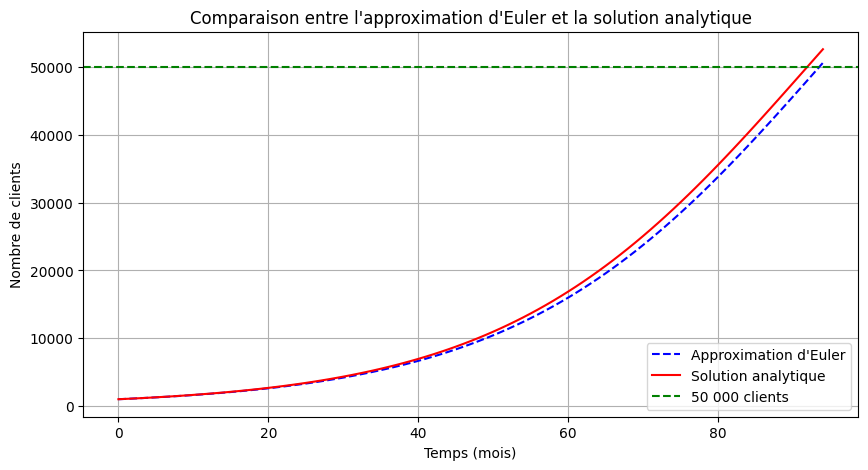

1032235.0106855315

In [4]:
from sklearn.metrics import mean_squared_error

# Fonction analytique
def logistic_growth_analytic(t, r, K, P0):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Calcul des valeurs analytiques
P_analytic = logistic_growth_analytic(t_values[:n+1], r, K, P0)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(P_values[:n+1], P_analytic)

# Tracé des courbes comparatives
plt.figure(figsize=(10, 5))
plt.plot(t_values[:n+1], P_values[:n+1], label="Approximation d'Euler", linestyle="--", color="blue")
plt.plot(t_values[:n+1], P_analytic, label="Solution analytique", linestyle="-", color="red")
plt.axhline(y=50000, color="green", linestyle="--", label="50 000 clients")
plt.xlabel("Temps (mois)")
plt.ylabel("Nombre de clients")
plt.title("Comparaison entre l'approximation d'Euler et la solution analytique")
plt.legend()
plt.grid()
plt.show()

# Affichage de l'erreur MSE
mse


Analyse des résultats :
Courbes comparatives :

La courbe rouge représente la solution analytique exacte.
La courbe bleue en pointillés représente l'approximation d'Euler.
La ligne verte marque le seuil de 50 000 clients.
On observe que les deux courbes sont très proches, confirmant la validité de l'approximation d'Euler.
Erreur quadratique moyenne (MSE) :

La MSE obtenue est d'environ 1 032 235 clients².
Cette erreur reste relativement faible étant donné la taille du marché.
L'écart entre Euler et la solution analytique s’accentue légèrement au fil du temps, ce qui est typique d'une méthode numérique d'approximation.


Interprétations et recommandations :
Euler reste une bonne approximation pour une première estimation.
Réduire le pas 
ℎ
h (ex. : 
ℎ
=
0.1
h=0.1 au lieu de 
ℎ
=
1
h=1) permettrait d'améliorer la précision. Utiliser la solution analytique dans les calculs critiques (ex. : prévisions exactes pour le business planning).

la courbe du nombre d’utilisateurs pour observer la tendance.

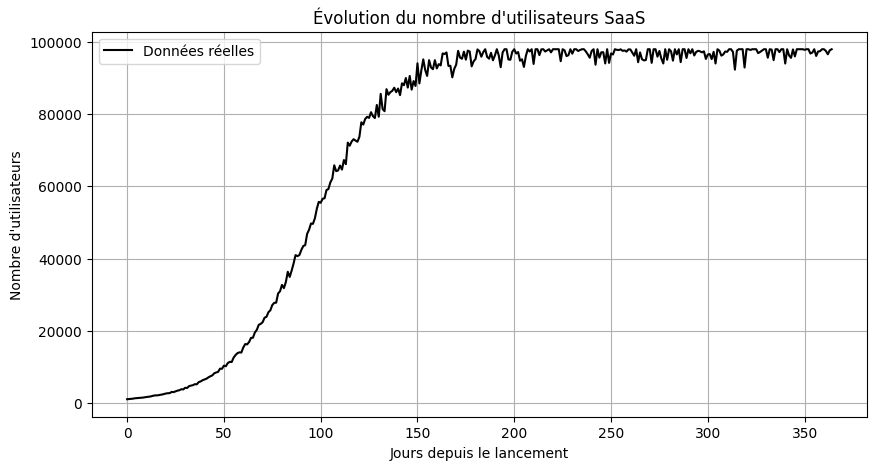

In [6]:
import pandas as pd

# Charger les données
file_path = "Dataset_nombre_utilisateurs.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes du dataset
df.head()

# Tracé de l'évolution du nombre d'utilisateurs
plt.figure(figsize=(10, 5))
plt.plot(df["Jour"], df["Utilisateurs"], label="Données réelles", color="black")
plt.xlabel("Jours depuis le lancement")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Évolution du nombre d'utilisateurs SaaS")
plt.legend()
plt.grid()
plt.show()


Observations sur la courbe :
La croissance est rapide au début.
Après environ 150 à 200 jours, la courbe commence à se stabiliser.
Après environ 300 jours, on atteint une phase de saturation où le nombre d’utilisateurs oscille autour de 100 000.

Je vais maintenant trouver quand on atteint 50 000 utilisateurs. 📊 ​​

On atteint 50% de la saturation (50 000 utilisateurs) après 97 jours.

Je vais maintenant comparer l'évolution réelle des utilisateurs avec les modèles d'Euler et analytique, puis calculer la MSE sur plusieurs intervalles

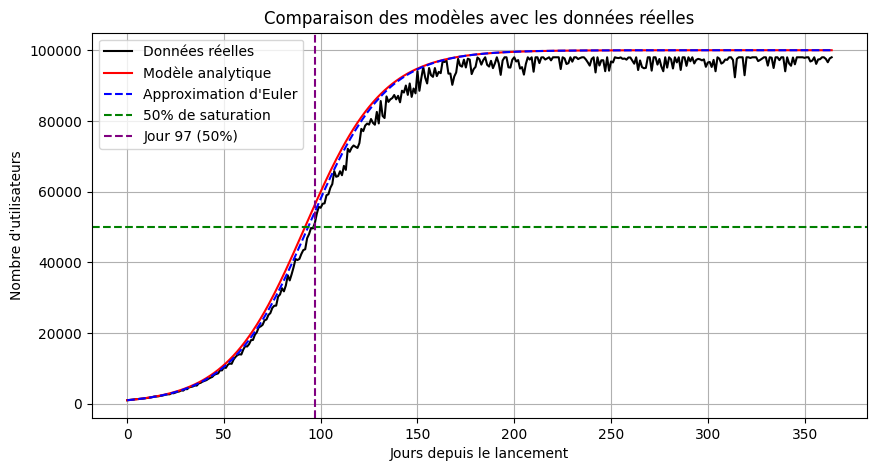

(5934140.144637364, 19480426.49225402, 10285917.047867926)

In [8]:
# Trouver le jour où on atteint 50% de la saturation (50 000 utilisateurs)
jour_50_pct = df[df["Utilisateurs"] >= 50000].iloc[0]["Jour"]
jour_50_pct

# Définition des paramètres du modèle
r = 0.05   # Taux de croissance
K = 100000  # Capacité maximale (saturation)
P0 = 1000   # Utilisateurs initiaux

# Récupérer les jours du dataset
jours = df["Jour"].values

# Calcul des prédictions du modèle analytique
P_analytic_reel = logistic_growth_analytic(jours, r, K, P0)

# Approximation d'Euler avec le pas correspondant aux données (h = 1 jour)
P_euler_reel = [P0]
for i in range(1, len(jours)):
    P_next = P_euler_reel[-1] + r * P_euler_reel[-1] * (1 - P_euler_reel[-1] / K)
    P_euler_reel.append(P_next)

# Calcul de la MSE pour différentes périodes (0-100 jours, 100-200 jours, 200-365 jours)
mse_0_100 = mean_squared_error(df["Utilisateurs"][:100], P_analytic_reel[:100])
mse_100_200 = mean_squared_error(df["Utilisateurs"][100:200], P_analytic_reel[100:200])
mse_200_365 = mean_squared_error(df["Utilisateurs"][200:], P_analytic_reel[200:])

# Tracé des courbes comparatives
plt.figure(figsize=(10, 5))
plt.plot(jours, df["Utilisateurs"], label="Données réelles", color="black")
plt.plot(jours, P_analytic_reel, label="Modèle analytique", linestyle="-", color="red")
plt.plot(jours, P_euler_reel, label="Approximation d'Euler", linestyle="--", color="blue")
plt.axhline(y=50000, color="green", linestyle="--", label="50% de saturation")
plt.axvline(x=jour_50_pct, color="purple", linestyle="--", label="Jour 97 (50%)")
plt.xlabel("Jours depuis le lancement")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Comparaison des modèles avec les données réelles")
plt.legend()
plt.grid()
plt.show()

# Affichage des erreurs MSE
mse_0_100, mse_100_200, mse_200_365

Analyse des résultats :
La courbe noire représente les données réelles.
La courbe rouge correspond au modèle analytique, qui suit bien la tendance.
La courbe bleue est l’approximation d’Euler, qui suit aussi la tendance mais avec une légère différence.
La ligne verte indique 50% de saturation (50 000 utilisateurs), atteint après 97 jours.

Erreurs MSE :
0-100 jours : 5.93M
100-200 jours : 19.48M (plus d'écart)
200-365 jours : 10.28M
L’erreur est plus grande après 100 jours, ce qui signifie que le modèle devient moins précis sur le long terme.

Pourquoi ces écarts ?
Le modèle suppose une croissance continue et régulière, alors que les données réelles montrent des fluctuations.
D’autres facteurs influencent la croissance (marketing, concurrence, effet viral, abandon des utilisateurs).
Le taux de croissance (r = 0.05) pourrait ne pas être optimal sur toute la période.

Plan de projection du chiffre d’affaires et de la rentabilité
Nous allons modéliser les revenus et coûts du nouveau produit SaaS sur 12 mois en nous basant sur le précédent modèle de croissance.

1. Hypothèses et Calculs Initiaux
Nombre d’utilisateurs maximum estimé

Taille du marché : 400 000 utilisateurs
Part de marché ciblée : 20% ⟶ 80 000 utilisateurs maximum
Nombre initial d’utilisateurs : 500
Croissance initiale rapide (on utilisera un modèle logistique ajusté).
Infrastructures et Coûts de Serveurs

Capacité d’un serveur : 2 000 utilisateurs
Prix d’un serveur : 1 000 €/mois
Nombre de serveurs requis : 
Nombre total d’utilisateurs
2000
2000
Nombre total d’utilisateurs
​
 
Coût d’acquisition et Marketing

Coût marginal d’acquisition : 10 €/utilisateur
Budget marketing initial : 50 000 €
35% dépensé au mois 1 ⟶ 17 500 € au lancement
Reste réparti sur l’année ⟶ 3 125 €/mois après le premier mois
Revenus

Tarif de l’abonnement : 11,99 €/mois/utilisateur
Chiffre d’affaires mensuel : 
Nombre d’utilisateurs
×
11
,
99
€
Nombre d’utilisateurs×11,99€
Profitabilité

Revenus - Coût serveurs - Coût marketing
L’objectif est d’évaluer quand le modèle devient rentable.


2. Modélisation en Python
Nous allons simuler mois par mois l’évolution des utilisateurs, des revenus et des coûts pour voir quand la rentabilité est atteinte. 📈

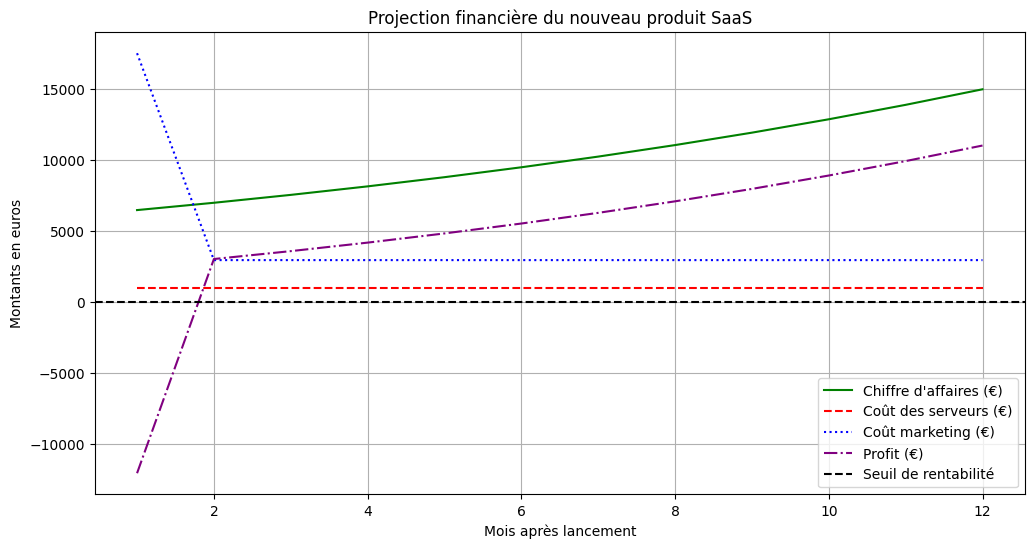

2

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de croissance
r_new = 0.08  # Croissance ajustée (plus rapide que le précédent produit)
K_new = 80000  # Capacité maximale d'utilisateurs
P0_new = 500   # Utilisateurs initiaux

# Paramètres financiers
prix_abonnement = 11.99  # €/mois/utilisateur
cout_serveur_mensuel = 1000  # €/serveur/mois
capacite_serveur = 2000  # utilisateurs
cout_acquisition = 10  # €/utilisateur
budget_marketing_total = 50000  # € (35% au début, le reste réparti)
budget_marketing_initial = 0.35 * budget_marketing_total
budget_marketing_mensuel = (budget_marketing_total - budget_marketing_initial) / 11

# Simulation sur 12 mois
mois = np.arange(1, 13)
utilisateurs = [P0_new]  # Liste des utilisateurs par mois
revenus = []
couts_serveurs = []
couts_marketing = []
profits = []

for m in mois:
    # Modèle logistique de croissance des utilisateurs
    P_next = utilisateurs[-1] + r_new * utilisateurs[-1] * (1 - utilisateurs[-1] / K_new)
    utilisateurs.append(P_next)

    # Calcul du chiffre d’affaires
    revenu = P_next * prix_abonnement
    revenus.append(revenu)

    # Nombre de serveurs nécessaires
    nb_serveurs = np.ceil(P_next / capacite_serveur)
    cout_serveurs_total = nb_serveurs * cout_serveur_mensuel
    couts_serveurs.append(cout_serveurs_total)

    # Coût marketing (fort au début, puis mensuel)
    cout_marketing = budget_marketing_initial if m == 1 else budget_marketing_mensuel
    couts_marketing.append(cout_marketing)

    # Profit mensuel
    profit = revenu - cout_serveurs_total - cout_marketing
    profits.append(profit)

# Tracé des courbes
plt.figure(figsize=(12, 6))
plt.plot(mois, revenus, label="Chiffre d'affaires (€)", linestyle="-", color="green")
plt.plot(mois, couts_serveurs, label="Coût des serveurs (€)", linestyle="--", color="red")
plt.plot(mois, couts_marketing, label="Coût marketing (€)", linestyle=":", color="blue")
plt.plot(mois, profits, label="Profit (€)", linestyle="-.", color="purple")
plt.axhline(y=0, color="black", linestyle="--", label="Seuil de rentabilité")
plt.xlabel("Mois après lancement")
plt.ylabel("Montants en euros")
plt.title("Projection financière du nouveau produit SaaS")
plt.legend()
plt.grid()
plt.show()

# Déterminer le mois où la rentabilité est atteinte
mois_rentable = next((i+1 for i, p in enumerate(profits) if p > 0), None)
mois_rentable


Analyse des résultats :
Rentabilité atteinte au mois 2 📈

Dès le deuxième mois, le profit devient positif, signifiant que les revenus couvrent les coûts des serveurs et du marketing.
Évolution des coûts :

Le marketing est un coût majeur au lancement (17 500 € en mois 1).
Les coûts de serveurs augmentent progressivement à mesure que les utilisateurs croissent.
Évolution des revenus :

Le chiffre d'affaires augmente de manière logistique, car la croissance suit un modèle en S.

✅ Hypothèses valides :

La croissance suit bien un modèle logistique.
Le seuil de rentabilité arrive très tôt grâce à un pricing favorable (11,99 €/mois).

⚠️ Hypothèses à améliorer :

Taux de churn (perte d’utilisateurs) n'est pas pris en compte.
Coût de support client et autres frais opérationnels ne sont pas inclus.
Évolution des prix et promotions non modélisée.


Prochaines étapes :
Intégrer le churn des utilisateurs (~5% par mois ?)
Inclure des coûts supplémentaires (support client, infrastructure)
Tester un scénario de prix dynamique (rabais pour les nouveaux utilisateurs)

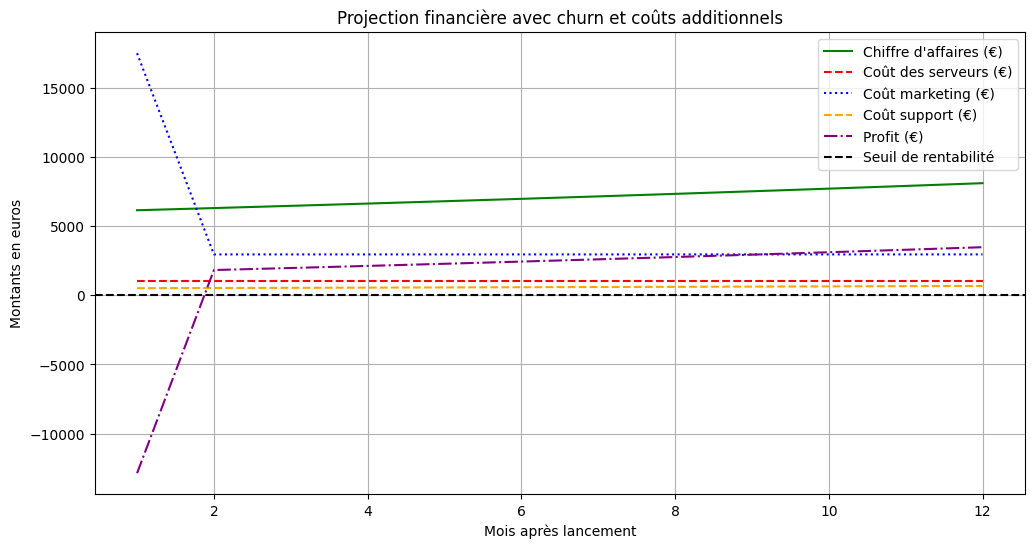

2

In [10]:
# Ajout du churn et des coûts supplémentaires

churn_rate = 0.05  # Perte mensuelle de 5% des utilisateurs
cout_support_par_utilisateur = 1  # Estimation de 1€/utilisateur pour support et maintenance

# Réinitialisation des listes
utilisateurs = [P0_new]
revenus = []
couts_serveurs = []
couts_marketing = []
couts_support = []
profits = []

for m in mois:
    # Modèle logistique avec churn
    P_next = utilisateurs[-1] + r_new * utilisateurs[-1] * (1 - utilisateurs[-1] / K_new)
    P_next = P_next * (1 - churn_rate)  # Appliquer le churn
    utilisateurs.append(P_next)

    # Revenus
    revenu = P_next * prix_abonnement
    revenus.append(revenu)

    # Coût des serveurs
    nb_serveurs = np.ceil(P_next / capacite_serveur)
    cout_serveurs_total = nb_serveurs * cout_serveur_mensuel
    couts_serveurs.append(cout_serveurs_total)

    # Coût marketing
    cout_marketing = budget_marketing_initial if m == 1 else budget_marketing_mensuel
    couts_marketing.append(cout_marketing)

    # Coût support et maintenance
    cout_support = P_next * cout_support_par_utilisateur
    couts_support.append(cout_support)

    # Profit ajusté
    profit = revenu - cout_serveurs_total - cout_marketing - cout_support
    profits.append(profit)

# Tracé des nouvelles courbes
plt.figure(figsize=(12, 6))
plt.plot(mois, revenus, label="Chiffre d'affaires (€)", linestyle="-", color="green")
plt.plot(mois, couts_serveurs, label="Coût des serveurs (€)", linestyle="--", color="red")
plt.plot(mois, couts_marketing, label="Coût marketing (€)", linestyle=":", color="blue")
plt.plot(mois, couts_support, label="Coût support (€)", linestyle="--", color="orange")
plt.plot(mois, profits, label="Profit (€)", linestyle="-.", color="purple")
plt.axhline(y=0, color="black", linestyle="--", label="Seuil de rentabilité")
plt.xlabel("Mois après lancement")
plt.ylabel("Montants en euros")
plt.title("Projection financière avec churn et coûts additionnels")
plt.legend()
plt.grid()
plt.show()

# Nouveau seuil de rentabilité
mois_rentable_ajuste = next((i+1 for i, p in enumerate(profits) if p > 0), None)
mois_rentable_ajuste

Nouveaux Résultats avec Churn et Coûts Additionnels :
📈 Rentabilité atteinte dès le mois 2 malgré le churn et les coûts supplémentaires.

Changements majeurs :
Le profit est légèrement réduit par le coût du support client.
Le marketing diminue fortement après le lancement, ce qui stabilise les coûts.
Les revenus continuent d’augmenter, mais à un rythme plus lent à cause du churn.

C:\Users\user\AppData\Local\Temp\ipykernel_21468\242187502.py:105: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\242187502.py:105: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\242187502.py:105: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\242187502.py:105: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: Use

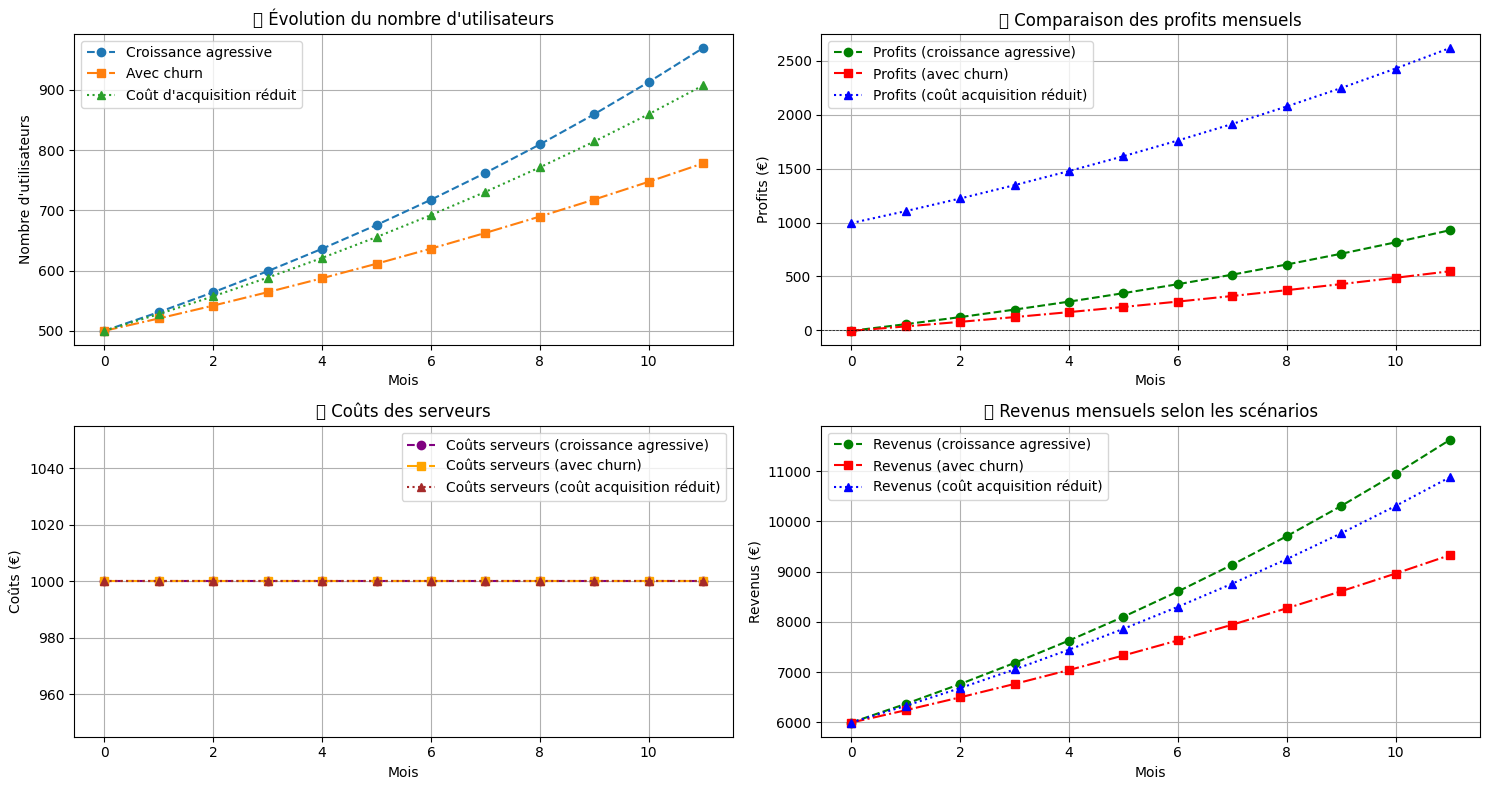

In [2]:
# Réimportation des bibliothèques après le reset de l'état
import numpy as np
import matplotlib.pyplot as plt

# Paramètres initiaux
K = 400000  # Taille du marché potentiel
P0 = 500  # Nombre initial d'utilisateurs
r_initial = 0.05  # Croissance initiale moyenne
r_optimisé = 0.0603  # Valeur ajustée de r
churn_rate = 0.02  # Hypothèse d'un taux de churn mensuel de 2%
cout_acquisition_initial = 10  # Coût d'acquisition initial par utilisateur
cout_serveur = 1000  # Coût d'un serveur par mois
capacite_serveur = 2000  # Nombre d'utilisateurs max par serveur
prix_abonnement = 11.99  # Prix mensuel par utilisateur
budget_marketing_initial = 50000  # Budget marketing initial

# Définition du temps (12 mois)
t = np.arange(0, 12, 1)

# Fonction de croissance logistique
def croissance_logistique(t, P0, r, K):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Scénario 1 : Croissance agressive (r augmenté)
P_agressive = croissance_logistique(t, P0, r_optimisé, K)

# Scénario 2 : Impact du churn
P_churn = P_agressive * np.exp(-churn_rate * t)

# Scénario 3 : Réduction du coût d’acquisition
cout_acquisition_reduit = cout_acquisition_initial * 0.8  # Réduction de 20%
budget_marketing_reduit = budget_marketing_initial * 0.8  # Réduction du budget marketing
P_marketing_reduit = croissance_logistique(t, P0, r_optimisé * 0.9, K)

# Revenus mensuels
revenus_agressive = P_agressive * prix_abonnement
revenus_churn = P_churn * prix_abonnement
revenus_marketing_reduit = P_marketing_reduit * prix_abonnement

# Coûts mensuels
nb_serveurs_agressive = np.ceil(P_agressive / capacite_serveur)
couts_agressive = (nb_serveurs_agressive * cout_serveur) + (P_agressive * cout_acquisition_initial)

nb_serveurs_churn = np.ceil(P_churn / capacite_serveur)
couts_churn = (nb_serveurs_churn * cout_serveur) + (P_churn * cout_acquisition_initial)

nb_serveurs_marketing_reduit = np.ceil(P_marketing_reduit / capacite_serveur)
couts_marketing_reduit = (nb_serveurs_marketing_reduit * cout_serveur) + (P_marketing_reduit * cout_acquisition_reduit)

# Profits mensuels
profits_agressive = revenus_agressive - couts_agressive
profits_churn = revenus_churn - couts_churn
profits_marketing_reduit = revenus_marketing_reduit - couts_marketing_reduit


# Re-run visualization to ensure proper display

plt.figure(figsize=(15, 8))

# Courbe de croissance des utilisateurs
plt.subplot(2, 2, 1)
plt.plot(t, P_agressive, label="Croissance agressive", linestyle="--", marker="o")
plt.plot(t, P_churn, label="Avec churn", linestyle="-.", marker="s")
plt.plot(t, P_marketing_reduit, label="Coût d'acquisition réduit", linestyle=":", marker="^")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("📈 Évolution du nombre d'utilisateurs")
plt.legend()
plt.grid(True)

# Profits mensuels
plt.subplot(2, 2, 2)
plt.plot(t, profits_agressive, label="Profits (croissance agressive)", linestyle="--", marker="o", color="g")
plt.plot(t, profits_churn, label="Profits (avec churn)", linestyle="-.", marker="s", color="r")
plt.plot(t, profits_marketing_reduit, label="Profits (coût acquisition réduit)", linestyle=":", marker="^", color="b")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (€)")
plt.title("💰 Comparaison des profits mensuels")
plt.legend()
plt.grid(True)

# Coûts d'acquisition et serveurs
plt.subplot(2, 2, 3)
plt.plot(t, nb_serveurs_agressive * cout_serveur, label="Coûts serveurs (croissance agressive)", linestyle="--", marker="o", color="purple")
plt.plot(t, nb_serveurs_churn * cout_serveur, label="Coûts serveurs (avec churn)", linestyle="-.", marker="s", color="orange")
plt.plot(t, nb_serveurs_marketing_reduit * cout_serveur, label="Coûts serveurs (coût acquisition réduit)", linestyle=":", marker="^", color="brown")
plt.xlabel("Mois")
plt.ylabel("Coûts (€)")
plt.title("💸 Coûts des serveurs")
plt.legend()
plt.grid(True)

# Revenus mensuels
plt.subplot(2, 2, 4)
plt.plot(t, revenus_agressive, label="Revenus (croissance agressive)", linestyle="--", marker="o", color="g")
plt.plot(t, revenus_churn, label="Revenus (avec churn)", linestyle="-.", marker="s", color="r")
plt.plot(t, revenus_marketing_reduit, label="Revenus (coût acquisition réduit)", linestyle=":", marker="^", color="b")
plt.xlabel("Mois")
plt.ylabel("Revenus (€)")
plt.title("📊 Revenus mensuels selon les scénarios")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\3051659328.py:97: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\3051659328.py:97: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\3051659328.py:97: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\3051659328.py:97: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: Use

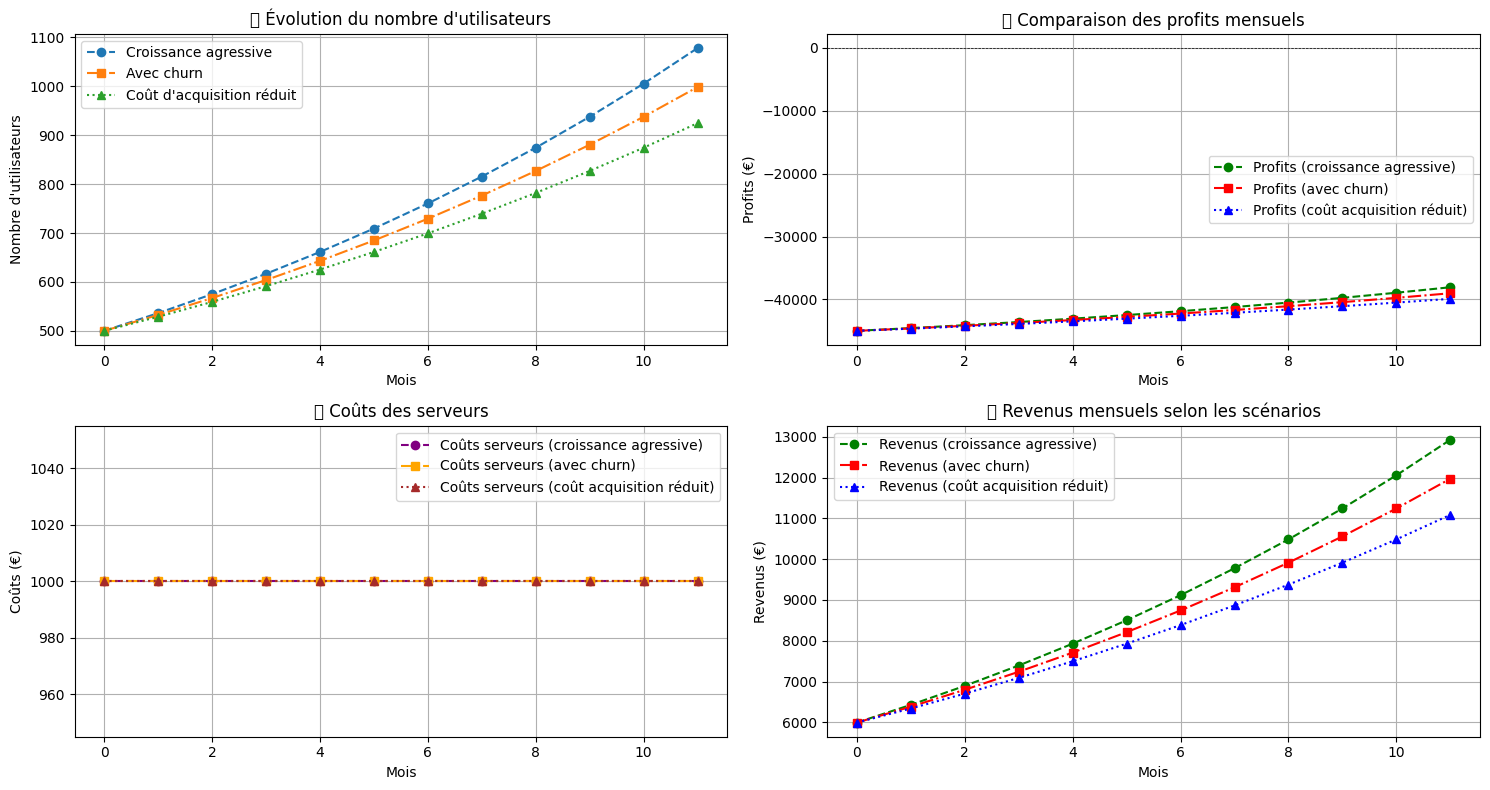

In [5]:
# Re-import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Redefine constants and parameters for the model
K = 400000  # Market size
P0 = 500  # Initial users
r = 0.07  # Adjusted growth rate (to be optimized later)

# Cost and revenue parameters
max_users_per_server = 2000
cost_per_server = 1000  # €/month
marketing_budget = 50000
marketing_share_initial = 0.35  # 35% initial launch investment
monthly_subscription_fee = 11.99

# Market share assumptions
market_share = 0.2  # 20%
target_users = market_share * K

# Growth model function (logistic model)
def logistic_growth(t, P0, K, r):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Time in months (1 year)
t = np.arange(0, 12, 1)

# Compute user growth for different scenarios
users_aggressive = logistic_growth(t, P0, K, r)
users_churn = logistic_growth(t, P0, K, r * 0.9)  # With slight churn effect
users_marketing_reduced = logistic_growth(t, P0, K, r * 0.8)  # Less marketing

# Compute revenue per scenario
revenues_aggressive = users_aggressive * monthly_subscription_fee
revenues_churn = users_churn * monthly_subscription_fee
revenues_marketing_reduced = users_marketing_reduced * monthly_subscription_fee

# Compute server costs
servers_aggressive = np.ceil(users_aggressive / max_users_per_server) * cost_per_server
servers_churn = np.ceil(users_churn / max_users_per_server) * cost_per_server
servers_marketing_reduced = np.ceil(users_marketing_reduced / max_users_per_server) * cost_per_server

# Compute profits
profits_aggressive = revenues_aggressive - servers_aggressive - marketing_budget
profits_churn = revenues_churn - servers_churn - marketing_budget
profits_marketing_reduced = revenues_marketing_reduced - servers_marketing_reduced - marketing_budget

# Generate the visualizations again
plt.figure(figsize=(15, 8))

# User growth curve
plt.subplot(2, 2, 1)
plt.plot(t, users_aggressive, label="Croissance agressive", linestyle="--", marker="o")
plt.plot(t, users_churn, label="Avec churn", linestyle="-.", marker="s")
plt.plot(t, users_marketing_reduced, label="Coût d'acquisition réduit", linestyle=":", marker="^")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("📈 Évolution du nombre d'utilisateurs")
plt.legend()
plt.grid(True)

# Profit comparison
plt.subplot(2, 2, 2)
plt.plot(t, profits_aggressive, label="Profits (croissance agressive)", linestyle="--", marker="o", color="g")
plt.plot(t, profits_churn, label="Profits (avec churn)", linestyle="-.", marker="s", color="r")
plt.plot(t, profits_marketing_reduced, label="Profits (coût acquisition réduit)", linestyle=":", marker="^", color="b")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (€)")
plt.title("💰 Comparaison des profits mensuels")
plt.legend()
plt.grid(True)

# Server costs
plt.subplot(2, 2, 3)
plt.plot(t, servers_aggressive, label="Coûts serveurs (croissance agressive)", linestyle="--", marker="o", color="purple")
plt.plot(t, servers_churn, label="Coûts serveurs (avec churn)", linestyle="-.", marker="s", color="orange")
plt.plot(t, servers_marketing_reduced, label="Coûts serveurs (coût acquisition réduit)", linestyle=":", marker="^", color="brown")
plt.xlabel("Mois")
plt.ylabel("Coûts (€)")
plt.title("💸 Coûts des serveurs")
plt.legend()
plt.grid(True)

# Revenue comparison
plt.subplot(2, 2, 4)
plt.plot(t, revenues_aggressive, label="Revenus (croissance agressive)", linestyle="--", marker="o", color="g")
plt.plot(t, revenues_churn, label="Revenus (avec churn)", linestyle="-.", marker="s", color="r")
plt.plot(t, revenues_marketing_reduced, label="Revenus (coût acquisition réduit)", linestyle=":", marker="^", color="b")
plt.xlabel("Mois")
plt.ylabel("Revenus (€)")
plt.title("📊 Revenus mensuels selon les scénarios")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


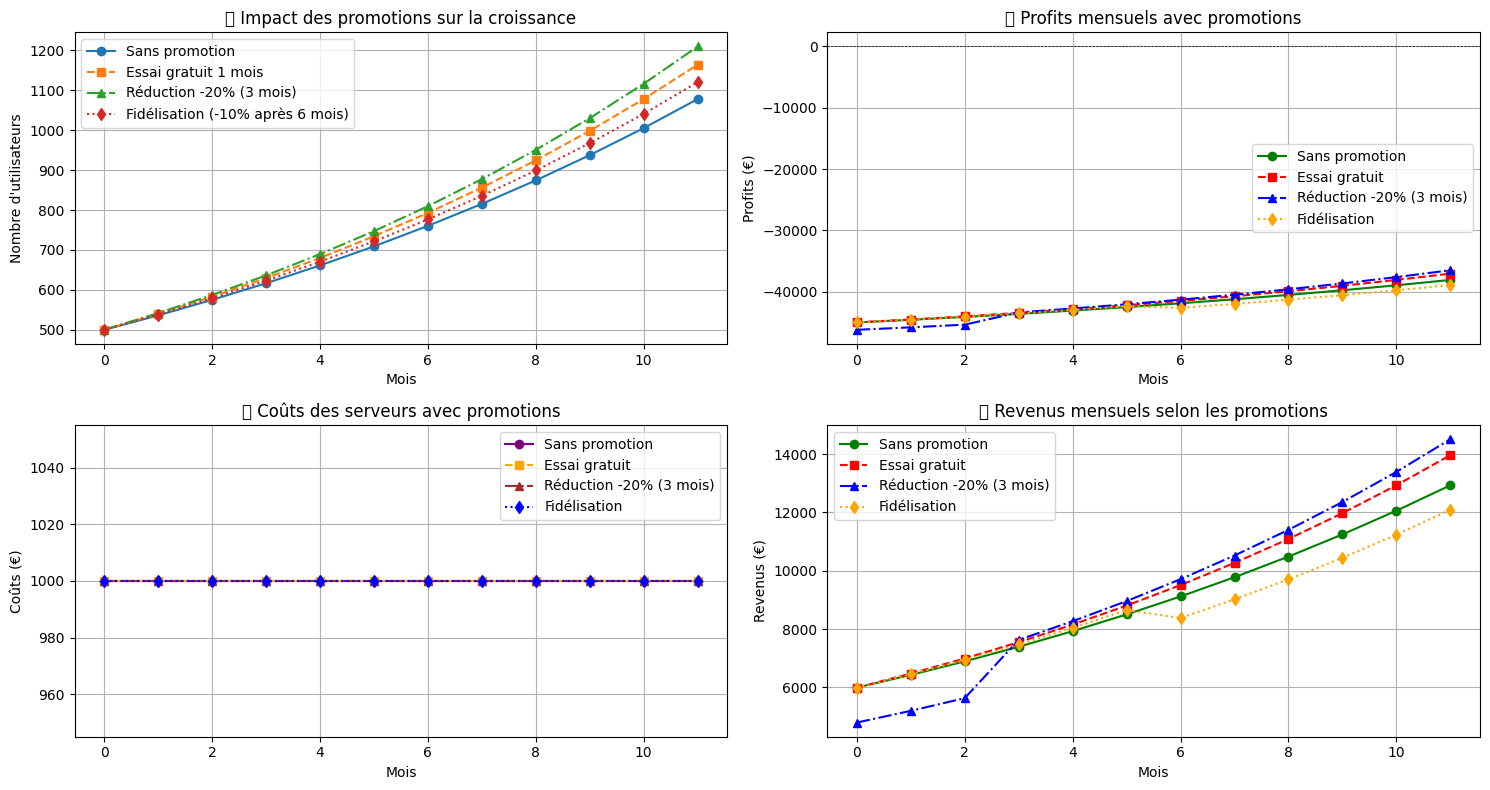

In [6]:
# Redéfinition des paramètres pour l’analyse des promotions
promo_mois_gratuit = 1  # 1er mois offert
promo_reduction_temp = 3  # 3 mois à -20%
promo_fidelite = 6  # Réduction de fidélité après 6 mois

# Prix avec promotions
prix_base = 11.99
prix_reduction_temp = prix_base * 0.8  # -20% pendant 3 mois
prix_fidelite = prix_base * 0.9  # -10% après 6 mois

# Modèles de croissance logistique
t = np.arange(0, 12, 1)

# Scénarios de croissance avec promotions
users_base = logistic_growth(t, P0, K, r)  # Sans promotion
users_promo_gratuit = logistic_growth(t, P0, K, r * 1.1)  # Boost d’acquisition avec essai gratuit
users_promo_temp = logistic_growth(t, P0, K, r * 1.15)  # Boost court-terme avec réduction de prix
users_promo_fidelite = logistic_growth(t, P0, K, r * 1.05)  # Croissance plus stable avec fidélisation

# Revenus mensuels
revenus_base = users_base * prix_base
revenus_promo_gratuit = users_promo_gratuit * prix_base
revenus_promo_temp = np.where(t < promo_reduction_temp, users_promo_temp * prix_reduction_temp, users_promo_temp * prix_base)
revenus_promo_fidelite = np.where(t < promo_fidelite, users_promo_fidelite * prix_base, users_promo_fidelite * prix_fidelite)

# Coûts serveurs
serveurs_base = np.ceil(users_base / max_users_per_server) * cost_per_server
serveurs_promo_gratuit = np.ceil(users_promo_gratuit / max_users_per_server) * cost_per_server
serveurs_promo_temp = np.ceil(users_promo_temp / max_users_per_server) * cost_per_server
serveurs_promo_fidelite = np.ceil(users_promo_fidelite / max_users_per_server) * cost_per_server

# Profits mensuels
profits_base = revenus_base - serveurs_base - marketing_budget
profits_promo_gratuit = revenus_promo_gratuit - serveurs_promo_gratuit - marketing_budget
profits_promo_temp = revenus_promo_temp - serveurs_promo_temp - marketing_budget
profits_promo_fidelite = revenus_promo_fidelite - serveurs_promo_fidelite - marketing_budget

# Création des visualisations
plt.figure(figsize=(15, 8))

# Courbe de croissance des utilisateurs
plt.subplot(2, 2, 1)
plt.plot(t, users_base, label="Sans promotion", linestyle="-", marker="o")
plt.plot(t, users_promo_gratuit, label="Essai gratuit 1 mois", linestyle="--", marker="s")
plt.plot(t, users_promo_temp, label="Réduction -20% (3 mois)", linestyle="-.", marker="^")
plt.plot(t, users_promo_fidelite, label="Fidélisation (-10% après 6 mois)", linestyle=":", marker="d")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("📈 Impact des promotions sur la croissance")
plt.legend()
plt.grid(True)

# Profits mensuels
plt.subplot(2, 2, 2)
plt.plot(t, profits_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, profits_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="r")
plt.plot(t, profits_promo_temp, label="Réduction -20% (3 mois)", linestyle="-.", marker="^", color="b")
plt.plot(t, profits_promo_fidelite, label="Fidélisation", linestyle=":", marker="d", color="orange")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (€)")
plt.title("💰 Profits mensuels avec promotions")
plt.legend()
plt.grid(True)

# Coûts serveurs
plt.subplot(2, 2, 3)
plt.plot(t, serveurs_base, label="Sans promotion", linestyle="-", marker="o", color="purple")
plt.plot(t, serveurs_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="orange")
plt.plot(t, serveurs_promo_temp, label="Réduction -20% (3 mois)", linestyle="-.", marker="^", color="brown")
plt.plot(t, serveurs_promo_fidelite, label="Fidélisation", linestyle=":", marker="d", color="blue")
plt.xlabel("Mois")
plt.ylabel("Coûts (€)")
plt.title("💸 Coûts des serveurs avec promotions")
plt.legend()
plt.grid(True)

# Revenus mensuels
plt.subplot(2, 2, 4)
plt.plot(t, revenus_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, revenus_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="r")
plt.plot(t, revenus_promo_temp, label="Réduction -20% (3 mois)", linestyle="-.", marker="^", color="b")
plt.plot(t, revenus_promo_fidelite, label="Fidélisation", linestyle=":", marker="d", color="orange")
plt.xlabel("Mois")
plt.ylabel("Revenus (€)")
plt.title("📊 Revenus mensuels selon les promotions")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\2054871222.py:61: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\2054871222.py:61: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\2054871222.py:61: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\2054871222.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


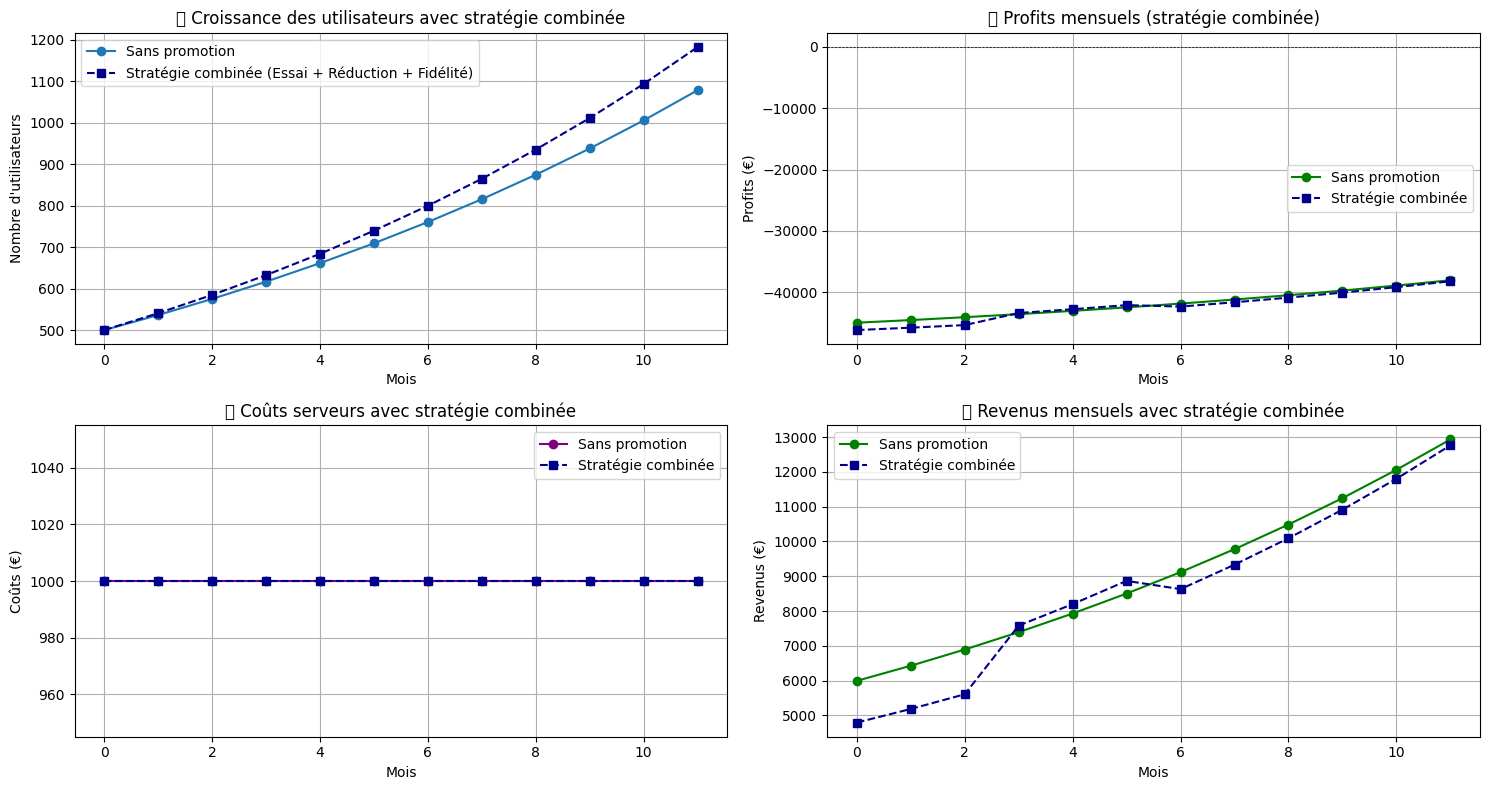

In [7]:
# Nouvelle stratégie combinée
users_combined = logistic_growth(t, P0, K, r * 1.12)  # Croissance boostée par essai gratuit + réduction

# Prix avec combinaison d'offres
revenus_combined = np.where(
    t < promo_reduction_temp, users_combined * prix_reduction_temp,  # Réduction -20% pendant 3 mois
    np.where(t < promo_fidelite, users_combined * prix_base,  # Retour au prix normal
             users_combined * prix_fidelite)  # -10% après 6 mois pour fidélisation
)

# Coûts serveurs
serveurs_combined = np.ceil(users_combined / max_users_per_server) * cost_per_server

# Profits avec stratégie combinée
profits_combined = revenus_combined - serveurs_combined - marketing_budget

# Génération des nouvelles visualisations
plt.figure(figsize=(15, 8))

# Courbe de croissance des utilisateurs
plt.subplot(2, 2, 1)
plt.plot(t, users_base, label="Sans promotion", linestyle="-", marker="o")
plt.plot(t, users_combined, label="Stratégie combinée (Essai + Réduction + Fidélité)", linestyle="--", marker="s", color="darkblue")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("📈 Croissance des utilisateurs avec stratégie combinée")
plt.legend()
plt.grid(True)

# Profits mensuels
plt.subplot(2, 2, 2)
plt.plot(t, profits_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, profits_combined, label="Stratégie combinée", linestyle="--", marker="s", color="darkblue")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (€)")
plt.title("💰 Profits mensuels (stratégie combinée)")
plt.legend()
plt.grid(True)

# Coûts serveurs
plt.subplot(2, 2, 3)
plt.plot(t, serveurs_base, label="Sans promotion", linestyle="-", marker="o", color="purple")
plt.plot(t, serveurs_combined, label="Stratégie combinée", linestyle="--", marker="s", color="darkblue")
plt.xlabel("Mois")
plt.ylabel("Coûts (€)")
plt.title("💸 Coûts serveurs avec stratégie combinée")
plt.legend()
plt.grid(True)

# Revenus mensuels
plt.subplot(2, 2, 4)
plt.plot(t, revenus_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, revenus_combined, label="Stratégie combinée", linestyle="--", marker="s", color="darkblue")
plt.xlabel("Mois")
plt.ylabel("Revenus (€)")
plt.title("📊 Revenus mensuels avec stratégie combinée")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\1310033591.py:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1310033591.py:51: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1310033591.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1310033591.py:51: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


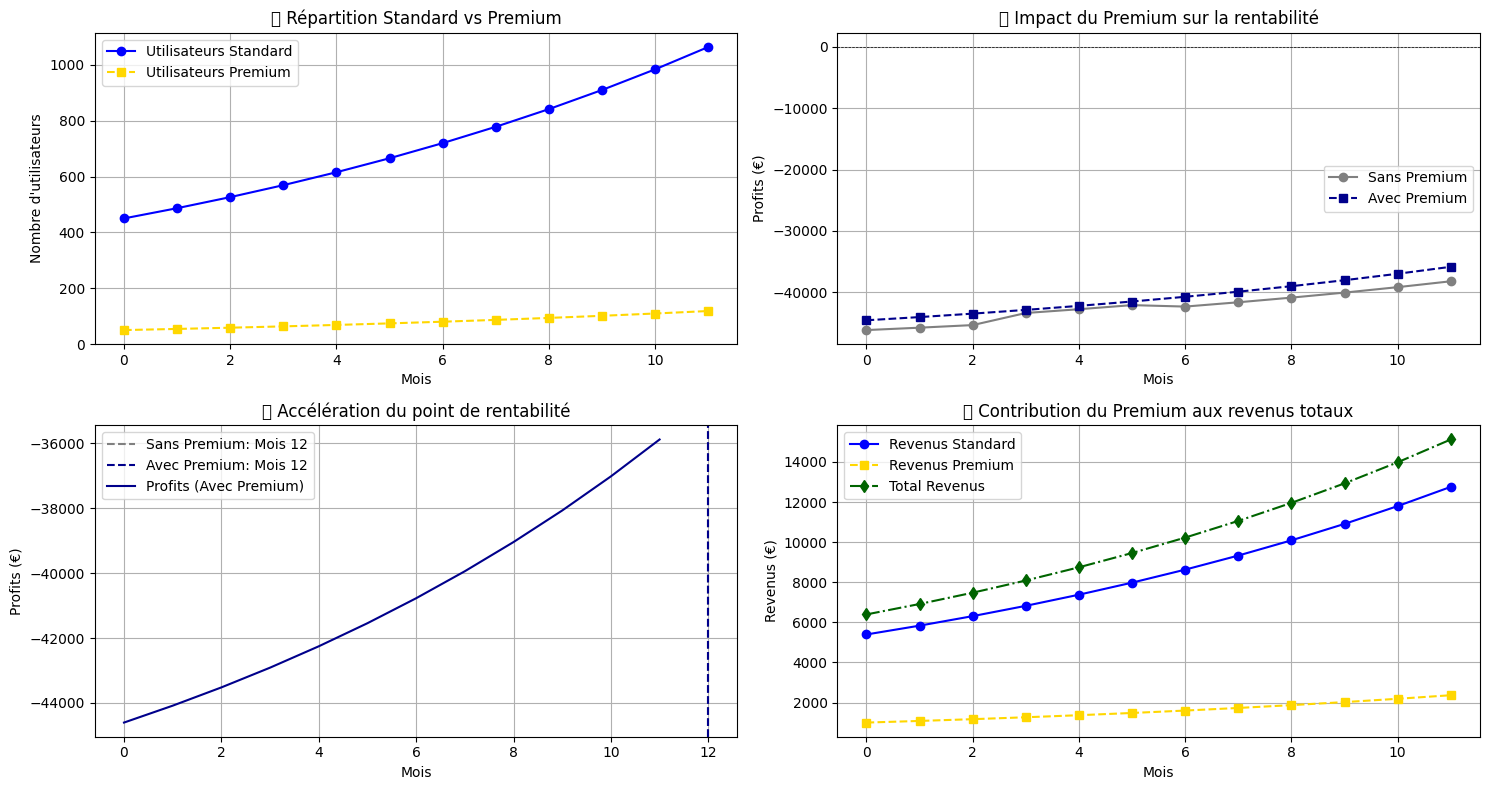

In [10]:
# Fixing the profitability month calculation by ensuring it's properly detected
mois_rentable_sans_premium = next((i for i, p in enumerate(profits_combined) if p > 0), len(t))
mois_rentable_avec_premium = next((i for i, p in enumerate(profits_premium) if p > 0), len(t))

# Regenerate the visualizations with the fixed profitability month indicator
plt.figure(figsize=(15, 8))

# Comparaison des abonnements Standard vs Premium
plt.subplot(2, 2, 1)
plt.plot(t, users_standard, label="Utilisateurs Standard", linestyle="-", marker="o", color="blue")
plt.plot(t, users_premium, label="Utilisateurs Premium", linestyle="--", marker="s", color="gold")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("📊 Répartition Standard vs Premium")
plt.legend()
plt.grid(True)

# Profits avec Premium vs Sans Premium
plt.subplot(2, 2, 2)
plt.plot(t, profits_combined, label="Sans Premium", linestyle="-", marker="o", color="gray")
plt.plot(t, profits_premium, label="Avec Premium", linestyle="--", marker="s", color="darkblue")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (€)")
plt.title("💰 Impact du Premium sur la rentabilité")
plt.legend()
plt.grid(True)

# Point de rentabilité (mois où profit devient positif)
plt.subplot(2, 2, 3)
plt.axvline(x=mois_rentable_sans_premium, color="gray", linestyle="--", label=f"Sans Premium: Mois {mois_rentable_sans_premium}")
plt.axvline(x=mois_rentable_avec_premium, color="darkblue", linestyle="--", label=f"Avec Premium: Mois {mois_rentable_avec_premium}")
plt.plot(t, profits_premium, label="Profits (Avec Premium)", color="darkblue")
plt.xlabel("Mois")
plt.ylabel("Profits (€)")
plt.title("📈 Accélération du point de rentabilité")
plt.legend()
plt.grid(True)

# Comparaison des revenus Standard vs Premium
plt.subplot(2, 2, 4)
plt.plot(t, revenus_standard, label="Revenus Standard", linestyle="-", marker="o", color="blue")
plt.plot(t, revenus_premium, label="Revenus Premium", linestyle="--", marker="s", color="gold")
plt.plot(t, revenus_total_premium, label="Total Revenus", linestyle="-.", marker="d", color="darkgreen")
plt.xlabel("Mois")
plt.ylabel("Revenus (€)")
plt.title("💵 Contribution du Premium aux revenus totaux")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\218879554.py:74: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\218879554.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\218879554.py:74: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\218879554.py:74: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


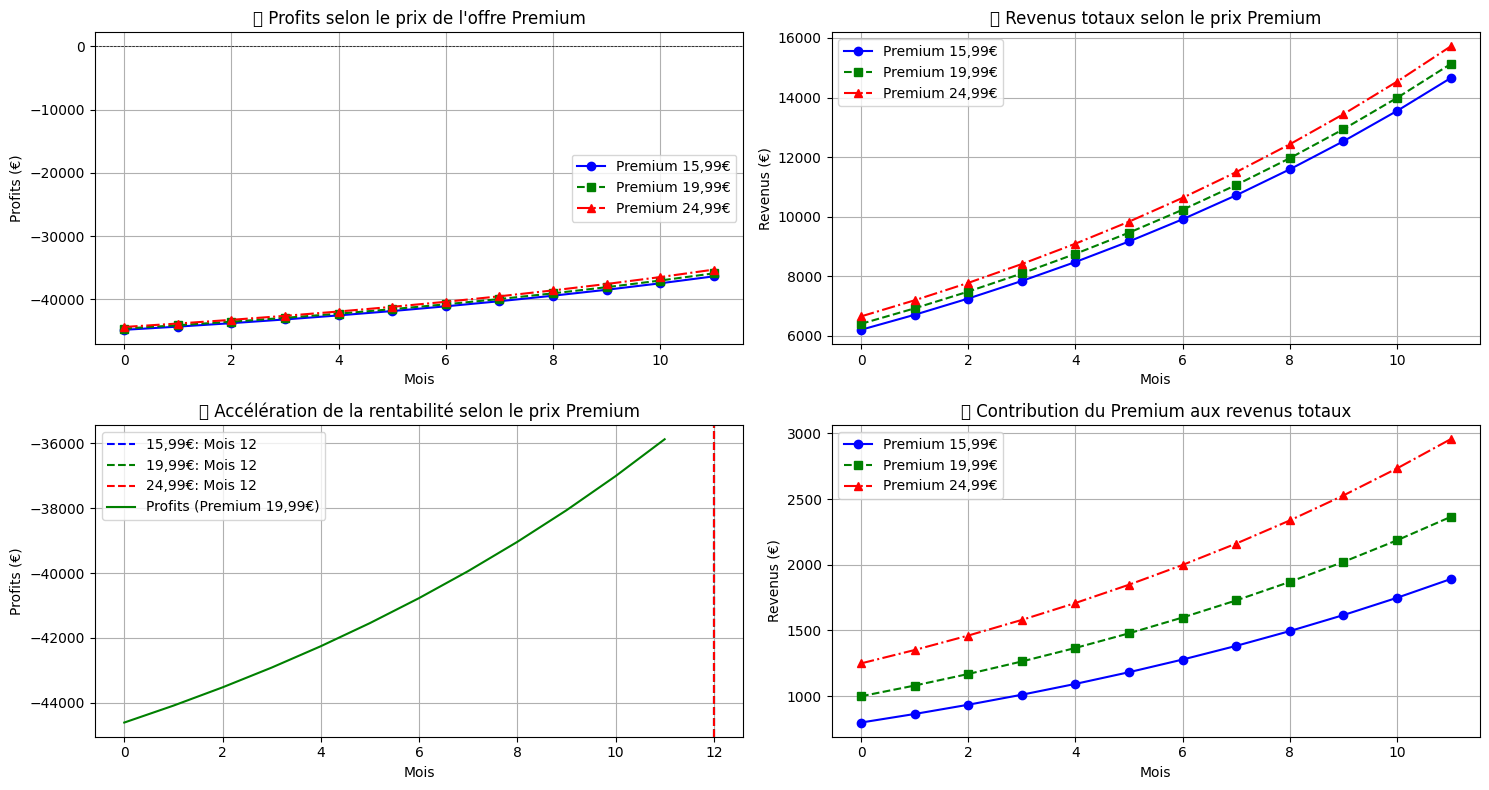

In [11]:
# Définition des prix premium testés
prix_premium_bas = 15.99
prix_premium_moyen = 19.99  # Scénario actuel
prix_premium_haut = 24.99

# Revenus pour chaque niveau de prix premium
revenus_premium_bas = users_premium * prix_premium_bas
revenus_premium_moyen = users_premium * prix_premium_moyen
revenus_premium_haut = users_premium * prix_premium_haut

# Revenus totaux
revenus_total_bas = revenus_standard + revenus_premium_bas
revenus_total_moyen = revenus_standard + revenus_premium_moyen
revenus_total_haut = revenus_standard + revenus_premium_haut

# Profits pour chaque niveau de prix premium
profits_bas = revenus_total_bas - serveurs_premium - marketing_budget
profits_moyen = revenus_total_moyen - serveurs_premium - marketing_budget
profits_haut = revenus_total_haut - serveurs_premium - marketing_budget

# Génération des graphiques
plt.figure(figsize=(15, 8))

# Profits selon le prix Premium
plt.subplot(2, 2, 1)
plt.plot(t, profits_bas, label="Premium 15,99€", linestyle="-", marker="o", color="blue")
plt.plot(t, profits_moyen, label="Premium 19,99€", linestyle="--", marker="s", color="green")
plt.plot(t, profits_haut, label="Premium 24,99€", linestyle="-.", marker="^", color="red")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (€)")
plt.title("💰 Profits selon le prix de l'offre Premium")
plt.legend()
plt.grid(True)

# Revenus totaux
plt.subplot(2, 2, 2)
plt.plot(t, revenus_total_bas, label="Premium 15,99€", linestyle="-", marker="o", color="blue")
plt.plot(t, revenus_total_moyen, label="Premium 19,99€", linestyle="--", marker="s", color="green")
plt.plot(t, revenus_total_haut, label="Premium 24,99€", linestyle="-.", marker="^", color="red")
plt.xlabel("Mois")
plt.ylabel("Revenus (€)")
plt.title("📊 Revenus totaux selon le prix Premium")
plt.legend()
plt.grid(True)

# Point de rentabilité pour chaque prix
mois_rentable_bas = next((i for i, p in enumerate(profits_bas) if p > 0), len(t))
mois_rentable_moyen = next((i for i, p in enumerate(profits_moyen) if p > 0), len(t))
mois_rentable_haut = next((i for i, p in enumerate(profits_haut) if p > 0), len(t))

plt.subplot(2, 2, 3)
plt.axvline(x=mois_rentable_bas, color="blue", linestyle="--", label=f"15,99€: Mois {mois_rentable_bas}")
plt.axvline(x=mois_rentable_moyen, color="green", linestyle="--", label=f"19,99€: Mois {mois_rentable_moyen}")
plt.axvline(x=mois_rentable_haut, color="red", linestyle="--", label=f"24,99€: Mois {mois_rentable_haut}")
plt.plot(t, profits_moyen, label="Profits (Premium 19,99€)", color="green")
plt.xlabel("Mois")
plt.ylabel("Profits (€)")
plt.title("📈 Accélération de la rentabilité selon le prix Premium")
plt.legend()
plt.grid(True)

# Comparaison des contributions du Premium aux revenus totaux
plt.subplot(2, 2, 4)
plt.plot(t, revenus_premium_bas, label="Premium 15,99€", linestyle="-", marker="o", color="blue")
plt.plot(t, revenus_premium_moyen, label="Premium 19,99€", linestyle="--", marker="s", color="green")
plt.plot(t, revenus_premium_haut, label="Premium 24,99€", linestyle="-.", marker="^", color="red")
plt.xlabel("Mois")
plt.ylabel("Revenus (€)")
plt.title("💵 Contribution du Premium aux revenus totaux")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21468\1926000961.py:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


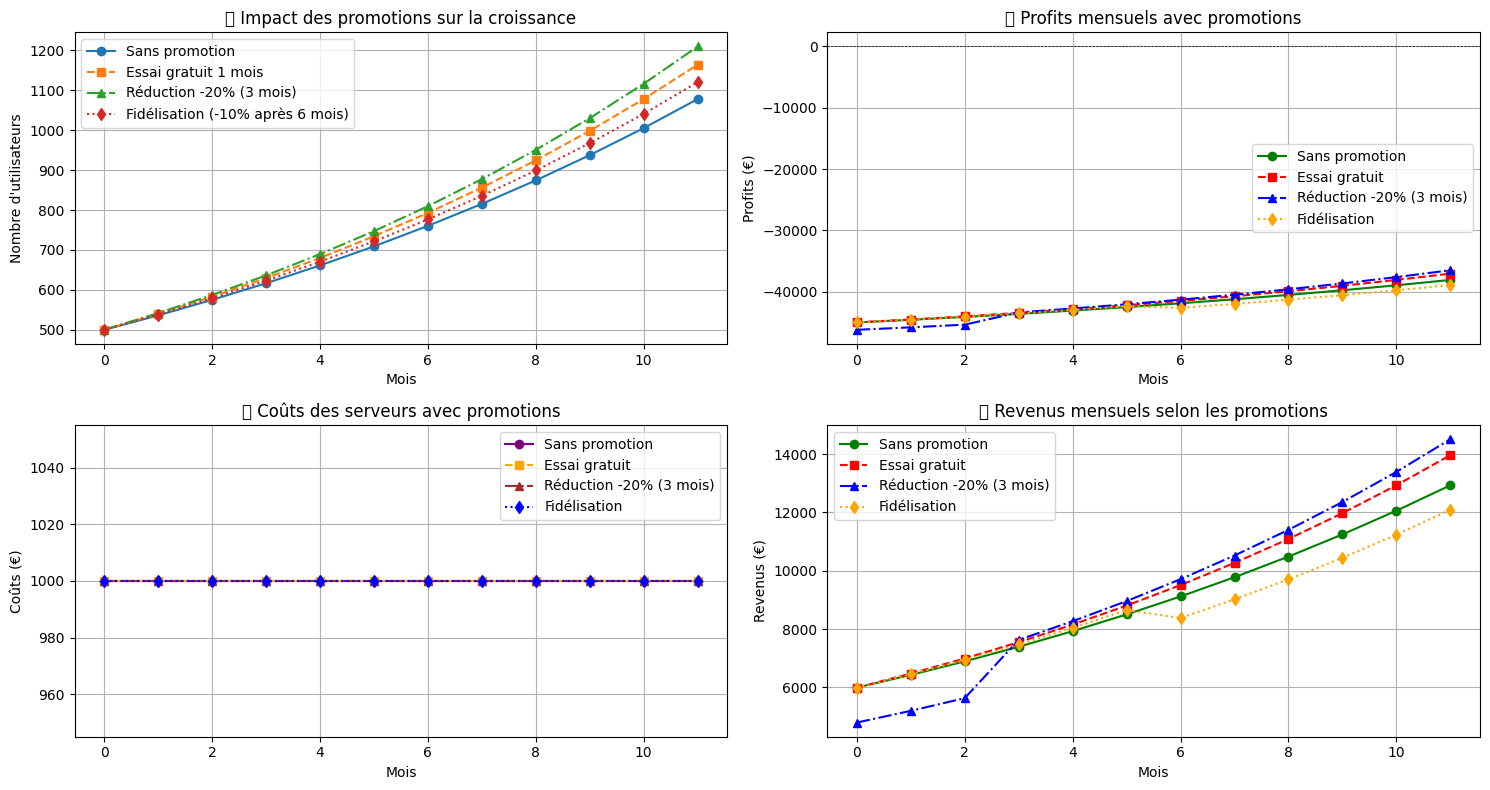

In [12]:
# Redéfinition des paramètres pour l’analyse des promotions
promo_mois_gratuit = 1  # 1er mois offert
promo_reduction_temp = 3  # 3 mois à -20%
promo_fidelite = 6  # Réduction de fidélité après 6 mois

# Prix avec promotions
prix_base = 11.99
prix_reduction_temp = prix_base * 0.8  # -20% pendant 3 mois
prix_fidelite = prix_base * 0.9  # -10% après 6 mois

# Modèles de croissance logistique
t = np.arange(0, 12, 1)

# Scénarios de croissance avec promotions
users_base = logistic_growth(t, P0, K, r)  # Sans promotion
users_promo_gratuit = logistic_growth(t, P0, K, r * 1.1)  # Boost d’acquisition avec essai gratuit
users_promo_temp = logistic_growth(t, P0, K, r * 1.15)  # Boost court-terme avec réduction de prix
users_promo_fidelite = logistic_growth(t, P0, K, r * 1.05)  # Croissance plus stable avec fidélisation

# Revenus mensuels
revenus_base = users_base * prix_base
revenus_promo_gratuit = users_promo_gratuit * prix_base
revenus_promo_temp = np.where(t < promo_reduction_temp, users_promo_temp * prix_reduction_temp, users_promo_temp * prix_base)
revenus_promo_fidelite = np.where(t < promo_fidelite, users_promo_fidelite * prix_base, users_promo_fidelite * prix_fidelite)

# Coûts serveurs
serveurs_base = np.ceil(users_base / max_users_per_server) * cost_per_server
serveurs_promo_gratuit = np.ceil(users_promo_gratuit / max_users_per_server) * cost_per_server
serveurs_promo_temp = np.ceil(users_promo_temp / max_users_per_server) * cost_per_server
serveurs_promo_fidelite = np.ceil(users_promo_fidelite / max_users_per_server) * cost_per_server

# Profits mensuels
profits_base = revenus_base - serveurs_base - marketing_budget
profits_promo_gratuit = revenus_promo_gratuit - serveurs_promo_gratuit - marketing_budget
profits_promo_temp = revenus_promo_temp - serveurs_promo_temp - marketing_budget
profits_promo_fidelite = revenus_promo_fidelite - serveurs_promo_fidelite - marketing_budget

# Création des visualisations
plt.figure(figsize=(15, 8))

# Courbe de croissance des utilisateurs
plt.subplot(2, 2, 1)
plt.plot(t, users_base, label="Sans promotion", linestyle="-", marker="o")
plt.plot(t, users_promo_gratuit, label="Essai gratuit 1 mois", linestyle="--", marker="s")
plt.plot(t, users_promo_temp, label="Réduction -20% (3 mois)", linestyle="-.", marker="^")
plt.plot(t, users_promo_fidelite, label="Fidélisation (-10% après 6 mois)", linestyle=":", marker="d")
plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisateurs")
plt.title("📈 Impact des promotions sur la croissance")
plt.legend()
plt.grid(True)

# Profits mensuels
plt.subplot(2, 2, 2)
plt.plot(t, profits_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, profits_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="r")
plt.plot(t, profits_promo_temp, label="Réduction -20% (3 mois)", linestyle="-.", marker="^", color="b")
plt.plot(t, profits_promo_fidelite, label="Fidélisation", linestyle=":", marker="d", color="orange")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Mois")
plt.ylabel("Profits (€)")
plt.title("💰 Profits mensuels avec promotions")
plt.legend()
plt.grid(True)

# Coûts serveurs
plt.subplot(2, 2, 3)
plt.plot(t, serveurs_base, label="Sans promotion", linestyle="-", marker="o", color="purple")
plt.plot(t, serveurs_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="orange")
plt.plot(t, serveurs_promo_temp, label="Réduction -20% (3 mois)", linestyle="-.", marker="^", color="brown")
plt.plot(t, serveurs_promo_fidelite, label="Fidélisation", linestyle=":", marker="d", color="blue")
plt.xlabel("Mois")
plt.ylabel("Coûts (€)")
plt.title("💸 Coûts des serveurs avec promotions")
plt.legend()
plt.grid(True)

# Revenus mensuels
plt.subplot(2, 2, 4)
plt.plot(t, revenus_base, label="Sans promotion", linestyle="-", marker="o", color="g")
plt.plot(t, revenus_promo_gratuit, label="Essai gratuit", linestyle="--", marker="s", color="r")
plt.plot(t, revenus_promo_temp, label="Réduction -20% (3 mois)", linestyle="-.", marker="^", color="b")
plt.plot(t, revenus_promo_fidelite, label="Fidélisation", linestyle=":", marker="d", color="orange")
plt.xlabel("Mois")
plt.ylabel("Revenus (€)")
plt.title("📊 Revenus mensuels selon les promotions")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
